## Importing necessary libraries

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Creating  training, validation and test datasets

In [3]:
batch_size = 20
valid_size = 0.2

# convert the images to torch.FloatTensor
transform = transforms.ToTensor()

# split data into train and test sets
trainset = datasets.MNIST('../datasets/', train=True,transform=transform)
testset = datasets.MNIST('../datasets/', train=False, transform=transform)

# creating a validation set from the training data
num_train = len(trainset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# defining the samplers for training and validation sets
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare the data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=train_sampler)
validloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=valid_sampler)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

### Visualising a btach of images

In [6]:
dataiter = iter(validloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([20, 1, 28, 28])
torch.Size([20])


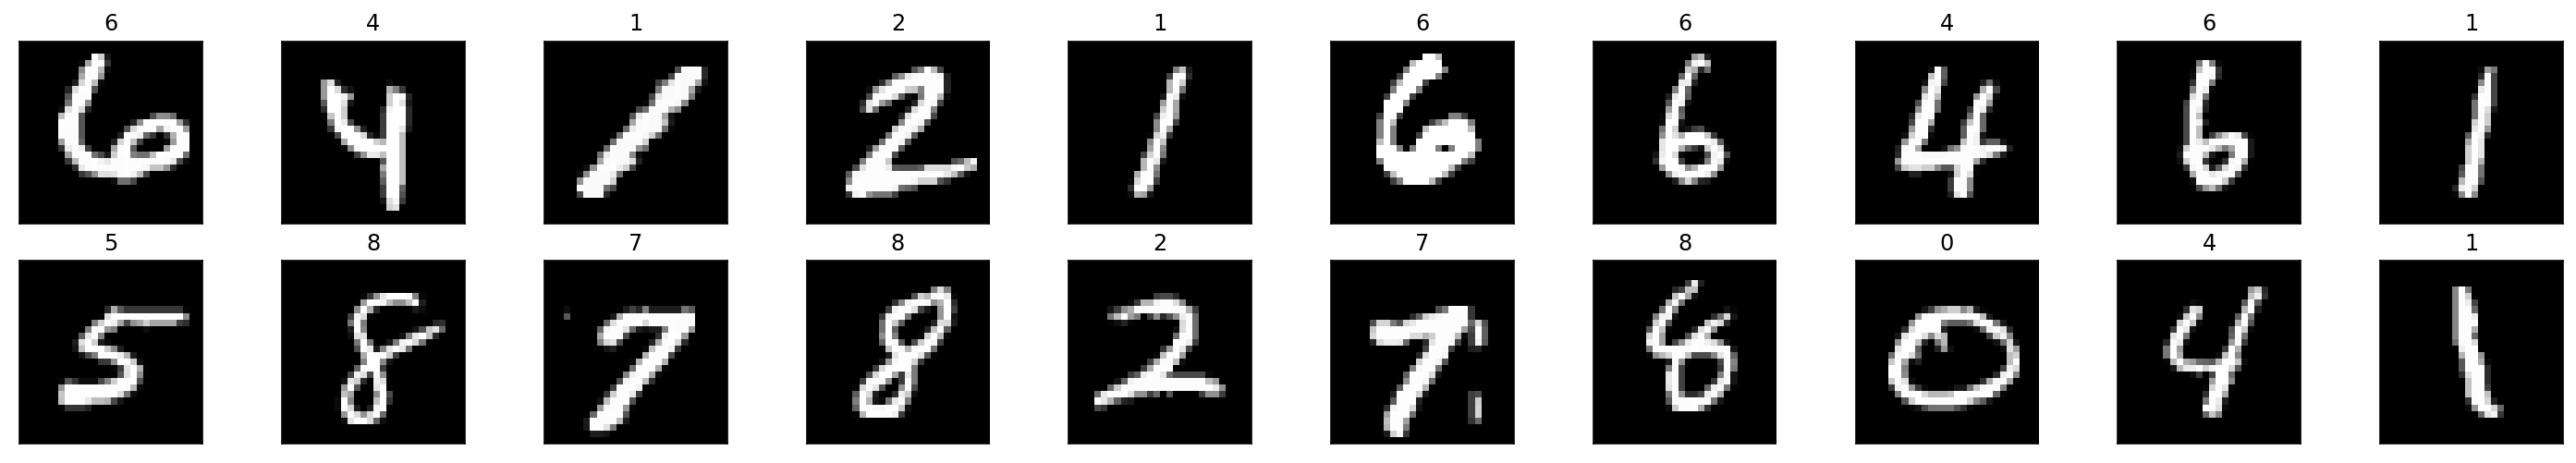

In [7]:
# .squeeze() removes dimensions of size 1.. eg if shape of a matrix is (1,28,28), then output after squeezing will be (28,28)
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [8]:
round?

Signature: round(number, ndigits=None)
Docstring:
Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.
Type:      builtin_function_or_method


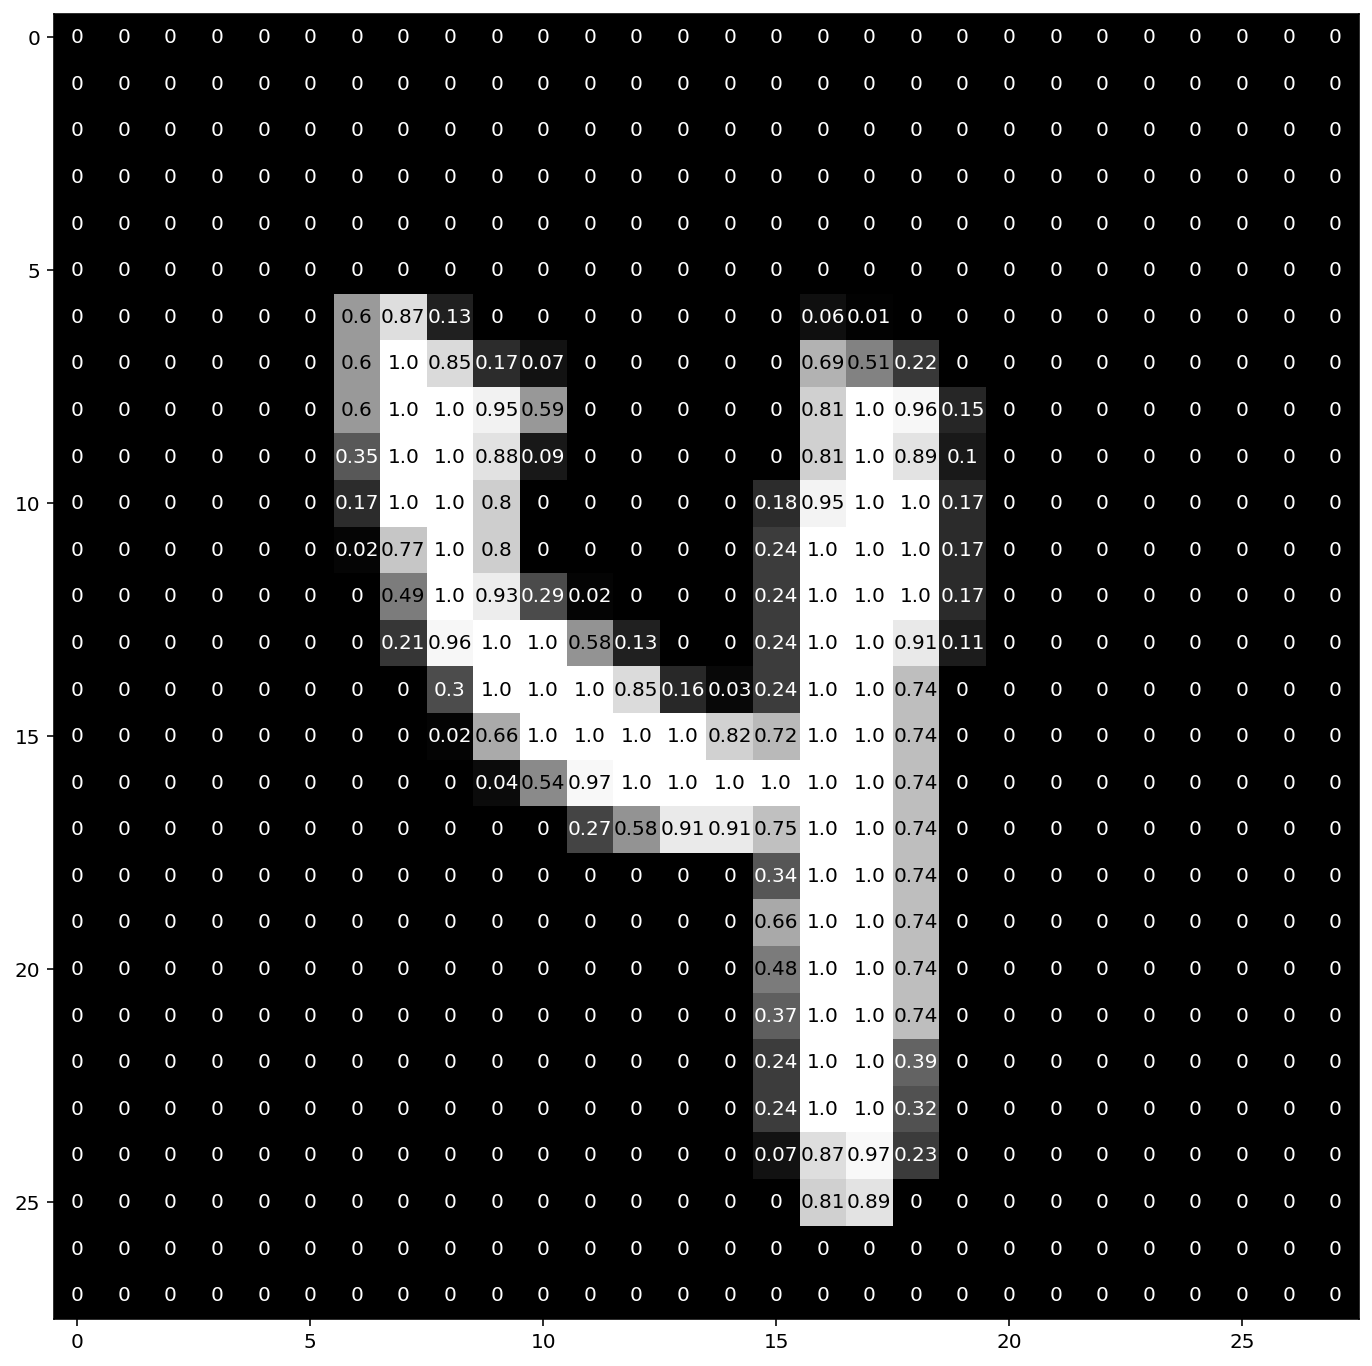

In [9]:
img = (np.squeeze(images[1])).numpy()

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = np.round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [10]:
images.view(images.shape[0],784).shape

torch.Size([20, 784])

In [11]:
images.view(images.shape[0], -1).shape

torch.Size([20, 784])

## Simple Neural Network from scratch

In [12]:
def activation(x):
    return (1/(1 + torch.exp(-x)))

def softmax(x):
    # converting the sum to shape of 64 by 1 since
    # the torch.sum returns a vector col. with 64 values.
    # we have to convert it to a shape of 64 rows with one val. per row in order to divide
    return (torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))

inputs = images.view(images.shape[0], -1)

n_inputs = inputs.shape[1]
n_hidden = 256
n_outputs = 10

W1 = torch.randn(n_inputs,n_hidden)
W2 = torch.randn(n_hidden,n_outputs)

B1 = torch.randn(n_hidden)
B2 = torch.randn(n_outputs)

y_hidden = activation(torch.mm(inputs, W1) + B1)
y_output = softmax(torch.mm(y_hidden, W2) + B2)

In [13]:
print(y_hidden.shape)
print(y_hidden.dtype)

torch.Size([20, 256])
torch.float32


In [14]:
y_output[:5]

tensor([[5.2171e-08, 9.2092e-04, 7.4684e-13, 3.4466e-06, 1.3751e-07, 1.0866e-08,
         9.8647e-01, 9.3795e-07, 6.5687e-05, 1.2536e-02],
        [1.1424e-14, 2.2362e-03, 8.6775e-12, 6.7185e-07, 1.9852e-03, 6.4267e-01,
         1.6878e-02, 1.6476e-01, 1.6902e-01, 2.4497e-03],
        [1.7677e-25, 1.7307e-16, 3.2599e-11, 8.4858e-14, 3.7204e-19, 5.9679e-12,
         6.7954e-07, 1.9309e-14, 9.2284e-12, 1.0000e+00],
        [7.0636e-14, 2.4888e-08, 8.3463e-13, 2.0754e-05, 2.2341e-11, 6.1084e-04,
         7.3272e-05, 2.8538e-09, 1.8954e-03, 9.9740e-01],
        [2.9725e-08, 3.8134e-11, 1.9910e-07, 1.1905e-02, 9.1360e-13, 2.5675e-04,
         7.6098e-04, 1.0055e-05, 7.6521e-01, 2.2186e-01]])

In [15]:
W1[:5]

tensor([[-1.8176,  0.4880,  1.3741,  ...,  1.7722, -0.2513,  0.0087],
        [ 1.6917,  1.3713,  1.2731,  ..., -1.4385, -0.8746,  2.6352],
        [ 0.1613,  1.1702,  0.2409,  ..., -0.3775, -0.1932, -0.7546],
        [ 0.4004, -1.1164, -0.8481,  ..., -1.8602, -0.4581,  1.8862],
        [ 0.5982, -0.7752, -0.8486,  ...,  0.9478, -0.2737,  0.4579]])

In [16]:
print(y_output.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000])


## Defining the architecture using PyTorch module

In [20]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        # defining the layers
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        
        self.fc1 = nn.Linear(28*28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 784)
        
        # pass through hidden layers with relu activation and dropout layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # pass through output layer with log softmax activation
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


#### Specify Loss function and Optimiser

In [21]:
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr=0.003)

In [23]:
%%time

epochs = 50
# setting min. valid. loss to array of infinity vals. so that the loss is very high initially
valid_loss_min = np.Inf

for e in range(epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for images, labels in trainloader:
        # clear the gradients
        optimizer.zero_grad()
        
        # perform a forward pass and store outputs
        net_output = model(images)
        # calculate loss 
        loss = criterion(net_output, labels)
        # perform a backward pass to calculate gradients
        loss.backward()
        # perform an optimisation step (ie. update parameters)
        optimizer.step()
        # track training loss
        train_loss += loss.item()*images.size(0)
        
    ######################
    # validate the model #
    ######################
    # turn off gradients for validation (saves memory and computation)
    with torch.no_grad():
        # turn on evaluation mode, ie. turn dropouts to zero
        model.eval()
        for images, labels in validloader:
            net_output = model(images)
            loss = criterion(net_output, labels)
            
            valid_loss += loss.item()*images.size(0)
    
    # calculate avg. loss for each epoch
    train_loss = train_loss/len(trainloader.sampler)
    valid_loss = valid_loss/len(validloader.sampler)
    
    print("Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(e+1, train_loss, valid_loss))
    
    # save the model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print("Validation Loss has decreased from {:.6f} to {:.6f}.  Saving model...".format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.204371 	Validation Loss: 0.147880
Validation Loss has decreased from inf to 0.147880.  Saving model...
Epoch: 2 	Training Loss: 0.179451 	Validation Loss: 0.138430
Validation Loss has decreased from 0.147880 to 0.138430.  Saving model...
Epoch: 3 	Training Loss: 0.171440 	Validation Loss: 0.134846
Validation Loss has decreased from 0.138430 to 0.134846.  Saving model...
Epoch: 4 	Training Loss: 0.158066 	Validation Loss: 0.156412
Epoch: 5 	Training Loss: 0.156562 	Validation Loss: 0.165545
Epoch: 6 	Training Loss: 0.148831 	Validation Loss: 0.131970
Validation Loss has decreased from 0.134846 to 0.131970.  Saving model...
Epoch: 7 	Training Loss: 0.141918 	Validation Loss: 0.147219
Epoch: 8 	Training Loss: 0.145300 	Validation Loss: 0.168991
Epoch: 9 	Training Loss: 0.135069 	Validation Loss: 0.165640
Epoch: 10 	Training Loss: 0.137521 	Validation Loss: 0.184634
Epoch: 11 	Training Loss: 0.134652 	Validation Loss: 0.153445
Epoch: 12 	Training Loss: 0.124856 	

### Load the best model (lowest validation loss)

In [24]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>